In [400]:
import numpy as np
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
from hiive.mdptoolbox.example import forest
from numpy.random import choice
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [401]:
P, R = forest(S=20, r1=10, r2=6, p=0.1)
env_name = 'Forest 20'

In [402]:
def test_policy(P, R, policy, test_count=100, gamma=0.9, max_iter=1000):
    num_state = P.shape[-1]
    episodes = num_state * test_count
    rewards = 0
    for s in range(num_state):
        s_reward = 0
        for epi in range(test_count):
            e_reward = 0
            r = 1
            while max_iter > 0:
                action = policy[s]
                p = P[action][s]
                candidates = list(range(len(p)))
                next_s = choice(candidates, 1, p=p)[0]
                
                e_reward += R[s][action] * r
                r *= gamma 
                max_iter += 1
                if next_s == 0:
                    break
            s_reward += e_reward
        rewards += s_reward
    return rewards / episodes
                

# Value Iteration

In [414]:
eps_list = list(np.linspace(1,10,10)/10)
gamma=0.9
# for eps in eps_list:
columns = ['env name', 'alg name', 'epsilon', 'Reward', 'Iteration', 'Time']
df_vi = pd.DataFrame(columns=columns)
for eps in eps_list:
    vi = ValueIteration(P, R, gamma=gamma, epsilon=eps)
    vi.run()
    # vi.policy
    reward = test_policy(P, R, vi.policy, 100)

    df_temp = pd.DataFrame([[env_name, 'value iteration', eps, reward, vi.iter, vi.time]], columns=columns)
    df_vi = pd.concat([df_vi, df_temp])
df_vi

,env name,alg name,epsilon,Reward,Iteration,Time
0,Forest 20,value iteration,0.1,2.783854,33,0.003961
0,Forest 20,value iteration,0.2,2.854419,29,0.001422
0,Forest 20,value iteration,0.3,2.934040,28,0.001377
0,Forest 20,value iteration,0.4,3.082212,26,0.001277
0,Forest 20,value iteration,0.5,2.904224,25,0.001298
0,Forest 20,value iteration,0.6,2.957835,24,0.001173
0,Forest 20,value iteration,0.7,2.711035,24,0.001136
0,Forest 20,value iteration,0.8,2.823972,23,0.001144
0,Forest 20,value iteration,0.9,2.798827,22,0.001080
0,Forest 20,value iteration,1.0,3.048139,22,0.001322


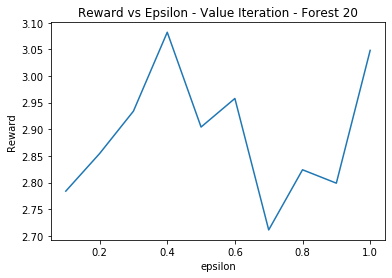

In [415]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='epsilon', y='Reward', data=df_vi)
plt.title('Reward vs Epsilon - Value Iteration - {}'.format(env_name))
plt.show()

In [407]:
gamma_list = list(np.linspace(1,10,10)/10)
columns = ['env name', 'alg name', 'gamma', 'Reward', 'Iteration', 'Time']
df_vi = pd.DataFrame(columns=columns)
for gamma in gamma_list:
    vi = ValueIteration(P, R, gamma=gamma)
    vi.run()
    # vi.policy
    reward = test_policy(P, R, vi.policy, 100, eps)

    df_temp = pd.DataFrame([[env_name, 'value iteration', gamma, reward, vi.iter, vi.time]], columns=columns)
    df_vi = pd.concat([df_vi, df_temp])
df_vi

,env name,alg name,gamma,Reward,Iteration,Time
0,Forest 20,value iteration,0.1,6.025,2,0.000475
0,Forest 20,value iteration,0.2,6.105,4,0.000212
0,Forest 20,value iteration,0.3,5.965,5,0.000534
0,Forest 20,value iteration,0.4,5.360,7,0.000353
0,Forest 20,value iteration,0.5,4.955,9,0.000465
0,Forest 20,value iteration,0.6,5.470,12,0.000706
0,Forest 20,value iteration,0.7,5.190,17,0.000832
0,Forest 20,value iteration,0.8,5.830,26,0.001327
0,Forest 20,value iteration,0.9,4.505,44,0.002116
0,Forest 20,value iteration,1.0,5.030,24,0.002647


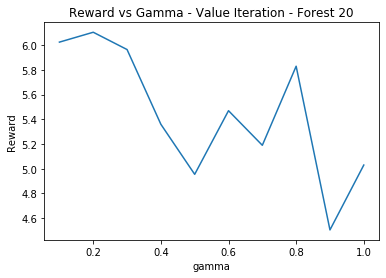

In [408]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='gamma', y='Reward', data=df_vi)
plt.title('Reward vs Gamma - Value Iteration - {}'.format(env_name))
plt.show()

In [356]:
# gamma=0.9
# max_iter_list = [10, 100, 1000]
# columns = ['env name', 'alg name', 'max iter', 'Reward', 'Iteration', 'Time']
# df_vi = pd.DataFrame(columns=columns)
# for max_iter in max_iter_list:
#     vi = ValueIteration(P, R, gamma=gamma, max_iter=max_iter)
#     vi.run()
#     # vi.policy
#     reward = test_policy(P, R, vi.policy, 100, eps)

#     df_temp = pd.DataFrame([[env_name, 'value iteration', max_iter, reward, vi.iter, vi.time]], columns=columns)
#     df_vi = pd.concat([df_vi, df_temp])
# df_vi

,env name,alg name,max iter,Reward,Iteration,Time,Value Func
0,Forest 20,value iteration,10,5.865,44,0.004301,"(4.429226083429906, 4.981660312099133, 4.98166..."
0,Forest 20,value iteration,100,4.835,44,0.002036,"(4.429226083429906, 4.981660312099133, 4.98166..."
0,Forest 20,value iteration,1000,5.280,44,0.002489,"(4.429226083429906, 4.981660312099133, 4.98166..."


# Policy Iteration

In [412]:
gamma_list = [i/10 for i in range(1, 10)]
columns = ['env name', 'alg name', 'gamma', 'Reward', 'Iteration', 'Time']
df_pi = pd.DataFrame(columns=columns)
for gamma in gamma_list:
    pi = PolicyIteration(P, R, gamma=gamma)
    pi.run()
    # vi.policy
    reward = test_policy(P, R, pi.policy)

    df_temp = pd.DataFrame([[env_name, 'policy iteration', gamma, reward, pi.iter, pi.time]], columns=columns)
    df_pi = pd.concat([df_pi, df_temp])
df_pi

,env name,alg name,gamma,Reward,Iteration,Time
0,Forest 20,policy iteration,0.1,3.658884,1,0.000534
0,Forest 20,policy iteration,0.2,3.613840,2,0.000795
0,Forest 20,policy iteration,0.3,3.592210,2,0.000809
0,Forest 20,policy iteration,0.4,3.383619,3,0.001053
0,Forest 20,policy iteration,0.5,3.330904,4,0.001478
0,Forest 20,policy iteration,0.6,3.355141,5,0.001772
0,Forest 20,policy iteration,0.7,3.213914,7,0.002923
0,Forest 20,policy iteration,0.8,2.854451,9,0.003493
0,Forest 20,policy iteration,0.9,3.044024,14,0.004581


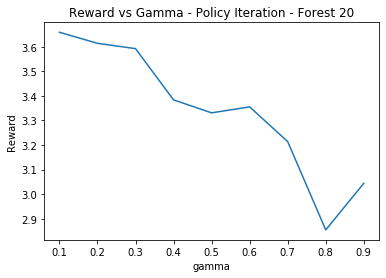

In [413]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='gamma', y='Reward', data=df_pi)
plt.title('Reward vs Gamma - Policy Iteration - {}'.format(env_name))
plt.show()

In [386]:
max_iter_list = [10, 100, 500, 1000, 10000]
columns = ['env name', 'alg name', 'max iter', 'Reward', 'Iteration', 'Time']
df_pi = pd.DataFrame(columns=columns)
for max_iter in max_iter_list:
    pi = PolicyIteration(P, R, gamma=0.9, max_iter=max_iter)
    pi.run()
    # vi.policy
    reward = test_policy(P, R, pi.policy)
    df_temp = pd.DataFrame([[env_name, 'policy iteration', max_iter, reward, pi.iter, pi.time]], columns=columns)
    df_pi = pd.concat([df_pi, df_temp])
df_pi

,env name,alg name,max iter,Reward,Iteration,Time
0,Forest 20,policy iteration,10,3.008016,10,0.004902
0,Forest 20,policy iteration,100,2.999435,14,0.004786
0,Forest 20,policy iteration,500,2.664877,14,0.004735
0,Forest 20,policy iteration,1000,3.100624,14,0.005113
0,Forest 20,policy iteration,10000,3.043903,14,0.004654


# Q-learning

In [416]:
gamma_list = [i/10 for i in range(1, 10)]
columns = ['env name', 'alg name', 'gamma', 'Reward', 'Time']
df_q = pd.DataFrame(columns=columns)
for gamma in gamma_list:
    Q = QLearning(P, R, gamma=gamma)
    Q.run()
    reward = test_policy(P, R, Q.policy)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', gamma, reward, Q.time]], columns=columns)
    df_q = pd.concat([df_q, df_temp])
df_q

,env name,alg name,gamma,Reward,Time
0,Forest 20,Q-Learning,0.1,3.130445,0.684560
0,Forest 20,Q-Learning,0.2,2.901077,0.453074
0,Forest 20,Q-Learning,0.3,2.918447,0.460258
0,Forest 20,Q-Learning,0.4,3.115691,0.449870
0,Forest 20,Q-Learning,0.5,0.750000,0.442230
0,Forest 20,Q-Learning,0.6,3.123759,0.480969
0,Forest 20,Q-Learning,0.7,3.177061,0.458161
0,Forest 20,Q-Learning,0.8,3.052463,0.430402
0,Forest 20,Q-Learning,0.9,3.178644,0.454411


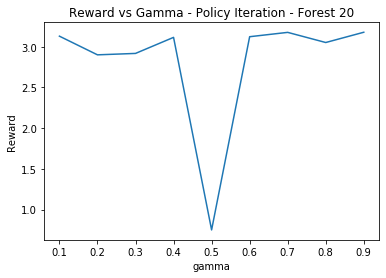

In [417]:
# df_gamma.plot(x='gamma', y='reward')
sns.lineplot(x='gamma', y='Reward', data=df_q)
plt.title('Reward vs Gamma - Policy Iteration - {}'.format(env_name))
plt.show()

In [389]:
epsilon_list = [i/10 for i in range(1, 10)]
columns = ['env name', 'alg name', 'epsilon', 'Reward', 'Time']
df_q = pd.DataFrame(columns=columns)
for epsilon in epsilon_list:
    Q = QLearning(P, R, 0.9, epsilon=epsilon)
    Q.run()
    reward = test_policy(P, R, Q.policy)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', epsilon, reward, Q.time]], columns=columns)
    df_q = pd.concat([df_q, df_temp])
df_q

,env name,alg name,epsilon,Reward,Time
0,Forest 20,Q-Learning,0.1,2.997503,0.447242
0,Forest 20,Q-Learning,0.2,3.125313,0.461338
0,Forest 20,Q-Learning,0.3,3.434901,0.440050
0,Forest 20,Q-Learning,0.4,3.123372,0.428330
0,Forest 20,Q-Learning,0.5,3.118881,0.440059
0,Forest 20,Q-Learning,0.6,3.090933,0.436101
0,Forest 20,Q-Learning,0.7,2.981823,0.451403
0,Forest 20,Q-Learning,0.8,3.337422,0.457116
0,Forest 20,Q-Learning,0.9,3.332601,0.427717


In [390]:
epsilon_decay_list = [i/10 for i in range(1, 10)]
columns = ['env name', 'alg name', 'epsilon decay', 'Reward', 'Time']
df_q = pd.DataFrame(columns=columns)
for eps_d in epsilon_decay_list:
    Q = QLearning(P, R, 0.9, epsilon_decay=eps_d)
    Q.run()
    reward = test_policy(P, R, Q.policy)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', eps_d, reward, Q.time]], columns=columns)
    df_q = pd.concat([df_q, df_temp])
df_q

,env name,alg name,epsilon decay,Reward,Time
0,Forest 20,Q-Learning,0.1,3.046582,0.448615
0,Forest 20,Q-Learning,0.2,2.860576,0.443706
0,Forest 20,Q-Learning,0.3,3.293755,0.440588
0,Forest 20,Q-Learning,0.4,3.245436,0.439209
0,Forest 20,Q-Learning,0.5,2.600335,0.463217
0,Forest 20,Q-Learning,0.6,3.049218,0.452491
0,Forest 20,Q-Learning,0.7,3.033874,0.449125
0,Forest 20,Q-Learning,0.8,3.033833,0.494831
0,Forest 20,Q-Learning,0.9,0.850000,0.481369


In [391]:
alpha_list = [i/10 for i in range(1, 10)]
columns = ['env name', 'alg name', 'alpha', 'Reward', 'Time']
df_q = pd.DataFrame(columns=columns)
for alpha in alpha_list:
    Q = QLearning(P, R, 0.9, alpha=alpha)
    Q.run()
    reward = test_policy(P, R, Q.policy)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', alpha, reward, Q.time]], columns=columns)
    df_q = pd.concat([df_q, df_temp])
df_q

,env name,alg name,alpha,Reward,Time
0,Forest 20,Q-Learning,0.1,2.999033,0.467202
0,Forest 20,Q-Learning,0.2,3.046728,0.449990
0,Forest 20,Q-Learning,0.3,0.800000,0.446889
0,Forest 20,Q-Learning,0.4,3.255045,0.429185
0,Forest 20,Q-Learning,0.5,2.896527,0.465606
0,Forest 20,Q-Learning,0.6,3.301814,0.445742
0,Forest 20,Q-Learning,0.7,2.996245,0.424894
0,Forest 20,Q-Learning,0.8,3.001708,0.450975
0,Forest 20,Q-Learning,0.9,2.921104,0.447509


In [393]:
max_iter_list = [10000, 20000, 30000, 40000, 50000, 100000, 200000]
columns = ['env name', 'alg name', 'max_iter', 'Reward', 'Time']
df_q = pd.DataFrame(columns=columns)
for max_iter in max_iter_list:
    Q = QLearning(P, R, 0.9, n_iter=max_iter)
    Q.run()
    reward = test_policy(P, R, Q.policy)
    df_temp = pd.DataFrame([[env_name, 'Q-Learning', max_iter, reward, Q.time]], columns=columns)
    df_q = pd.concat([df_q, df_temp])
df_q

,env name,alg name,max_iter,Reward,Time
0,Forest 20,Q-Learning,10000,3.120933,0.443464
0,Forest 20,Q-Learning,20000,3.281138,0.786055
0,Forest 20,Q-Learning,30000,3.195897,1.114444
0,Forest 20,Q-Learning,40000,3.170308,1.453475
0,Forest 20,Q-Learning,50000,3.235985,1.948658
0,Forest 20,Q-Learning,100000,3.303693,3.787307
0,Forest 20,Q-Learning,200000,1.100000,7.415893
